**Analisando Dados de Vacinação da cidade de São Paulo retirados do OPEN DataSUS e relacionando com a volta as aulas no município**

Lucas Roberto de Oliveira Lopes, lucas1308@usp.br

Grupo Predict ICMC

Universidade de São Paulo, São Carlos, Brasil.


___________________________________________________________________________________________

In [ ]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
#Criando diretorio no Drive para armazenar os dados
!mkdir -p "/content/drive/MyDrive/vacina-covid"

In [ ]:
#Baixando os dados do site do Data SUS
!wget -P "/content/drive/MyDrive/vacina-covid" https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-08-17/uf%3DSP/part-00000-b1ecaa57-3f69-45f7-9abb-ceb030286a3b.c000.csv

--2021-08-18 20:08:28--  https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-08-17/uf%3DSP/part-00000-b1ecaa57-3f69-45f7-9abb-ceb030286a3b.c000.csv
Resolving s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)... 52.95.165.80
Connecting to s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)|52.95.165.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21621880825 (20G) [text/csv]
Saving to: ‘/content/drive/MyDrive/vacina-covid/part-00000-b1ecaa57-3f69-45f7-9abb-ceb030286a3b.c000.csv’

part-00000-b1ecaa57 100%[===================>]  20.14G  10.3MB/s    in 34m 25s 

2021-08-18 20:42:53 (9.99 MB/s) - ‘/content/drive/MyDrive/vacina-covid/part-00000-b1ecaa57-3f69-45f7-9abb-ceb030286a3b.c000.csv’ saved [21621880825/21621880825]



Vamos Importar apenas as colunas necessárias para diminuir a quantidade de Dados que está muito grande

In [ ]:
colunas = ['paciente_idade','estabelecimento_municipio_nome','vacina_dataaplicacao','vacina_descricao_dose']

In [ ]:
vacina = pd.read_csv("/content/drive/MyDrive/vacina-covid/part-00000-b1ecaa57-3f69-45f7-9abb-ceb030286a3b.c000.csv", sep = ";", usecols = colunas)

In [ ]:
print("Numero de linhas e Colunas:",vacina.shape)
vacina.head() 

Numero de linhas e Colunas: (42352790, 4)


,paciente_idade,estabelecimento_municipio_nome,vacina_dataaplicacao,vacina_descricao_dose
0,36.0,RIBEIRAO PRETO,2021-07-19,1ª Dose
1,61.0,SAO JOSE DOS CAMPOS,2021-05-05,1ª Dose
2,49.0,SAO PAULO,2021-04-19,1ª Dose
3,36.0,ITAPECERICA DA SERRA,2021-07-15,1ª Dose
4,34.0,CAMPO LIMPO PAULISTA,2021-07-19,1ª Dose


Filtrando os dados apenas para o municipio de São Paulo 

In [ ]:
vacina_sp = vacina.loc[vacina["estabelecimento_municipio_nome"]== "SAO PAULO"]

In [ ]:
#Vamos visualizar os dados e a quantidade que temos
print("Linhas e Colunas",vacina_sp.shape)
vacina_sp.head()

Linhas e Colunas (12461415, 4)


,paciente_idade,estabelecimento_municipio_nome,vacina_dataaplicacao,vacina_descricao_dose
2,49.0,SAO PAULO,2021-04-19,1ª Dose
7,58.0,SAO PAULO,2021-05-15,1ª Dose
8,45.0,SAO PAULO,2021-07-13,1ª Dose
13,37.0,SAO PAULO,2021-07-14,1ª Dose
14,37.0,SAO PAULO,2021-07-12,1ª Dose


De acordo com o site https://vacinaja.sp.gov.br/vacinometro/ até o dia **18/08/21** que foi o dia que essa análise foi feita  
o municipio de São Paulo tinha aplicado **13.248.961** vacinas

Nosso dataset possui **12.461.415** dados
Então possuimos uma amostra grande para a análise

In [ ]:
#Vamos verificar os dados faltantes
vacina_sp.isnull().sum()

paciente_idade                    7
estabelecimento_municipio_nome    0
vacina_dataaplicacao              0
vacina_descricao_dose             0
dtype: int64

In [ ]:
vacina_sp['vacina_descricao_dose'].value_counts()

1ª Dose            8710820
2ª Dose            3446800
Dose                288466
Única                15201
Dose Adicional         128
Name: vacina_descricao_dose, dtype: int64

In [ ]:
#Vamos organizar os dados da descrição da vacina 
#Primeiro vamos unir os dados iguais e eliminar as linhas que contem "Dose Adicional"
vacina_sp['vacina_descricao_dose'] = vacina_sp['vacina_descricao_dose'].replace('Dose\xa0','Única\xa0')
vacina_sp = vacina_sp.loc[vacina_sp['vacina_descricao_dose'] != 'Dose\xa0Adicional\xa0']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Ajustando as datas de aplicação
vacina_sp.vacina_dataaplicacao = pd.to_datetime(vacina_sp.vacina_dataaplicacao)

In [ ]:
#Vamos verificar quando começaram as vacinações e qual o ultimo dia de vacinação desses dados
vacina_sp.vacina_dataaplicacao.sort_values()

3673596    2021-01-17
29642172   2021-01-17
7986390    2021-01-17
42349562   2021-01-17
34919425   2021-01-17
              ...    
35031926   2021-08-15
33234948   2021-08-15
21303574   2021-08-15
32506092   2021-08-16
31470213   2021-08-16
Name: vacina_dataaplicacao, Length: 12461287, dtype: datetime64[ns]

In [ ]:
#Adicionando colunas com as semanas do ano e mês de aplicação
vacina_sp['semana_ano_aplicacao'] = vacina_sp.vacina_dataaplicacao.dt.isocalendar().week
vacina_sp['mes_aplicacao'] = vacina_sp.vacina_dataaplicacao.dt.month

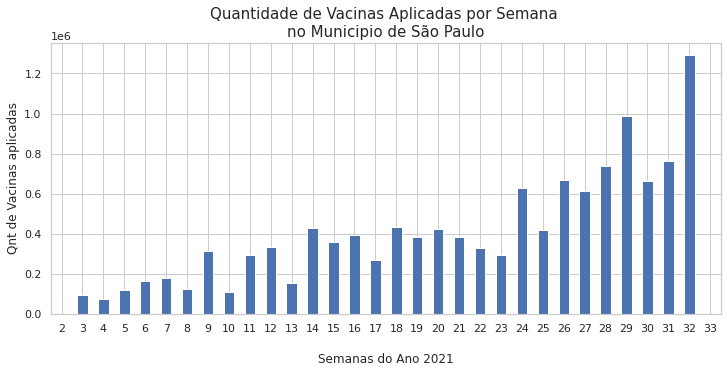

In [ ]:
#Plotando gráfico para ver a quantidade de vacina aplicada por semana em São Paulo
sns.set_theme(style="whitegrid")
p = vacina_sp['semana_ano_aplicacao'].value_counts().sort_index().plot(kind = 'bar', figsize = (12,5),xlabel = "\nSemanas do Ano 2021",ylabel = "Qnt de Vacinas aplicadas")
p.set_xticklabels(p.get_xticklabels(),rotation = 360)
plt.title("Quantidade de Vacinas Aplicadas por Semana \nno Municipio de São Paulo",fontsize = 15)
plt.show()

In [ ]:
semana = [i for i in vacina_sp['semana_ano_aplicacao'].value_counts().sort_index().cumsum().index]
quantidade = [i for i in vacina_sp['semana_ano_aplicacao'].value_counts().sort_index().cumsum().values]

In [ ]:
dataframe = {"semana":semana,'quantidade':quantidade}
df = pd.DataFrame(dataframe)

In [ ]:
import plotly.express as px
fig = px.line(df, x='semana', y="quantidade")
fig.show()

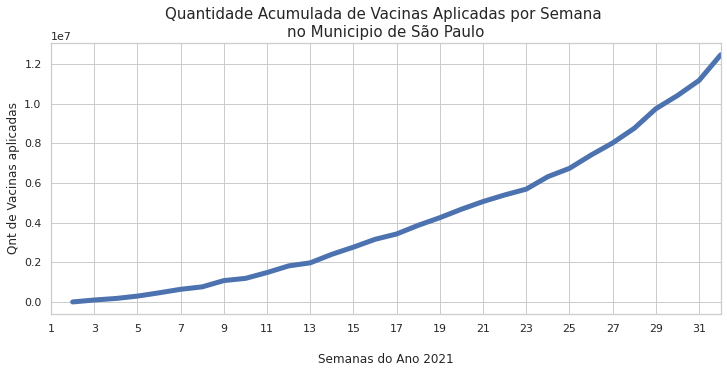

In [ ]:
#Agora a quantidade de vacinas acumuladas
p = vacina_sp['semana_ano_aplicacao'].value_counts().sort_index().cumsum().plot(kind = 'line',figsize = (12,5),linewidth = 5,xlim = (1,32),xticks = (range(1,32,2)),xlabel = "\nSemanas do Ano 2021",ylabel = "Qnt de Vacinas aplicadas")
plt.title("Quantidade Acumulada de Vacinas Aplicadas por Semana \nno Municipio de São Paulo",fontsize = 15)
plt.show()

Precisamos Agora diferenciar as doses que cada pessoa esta tomando

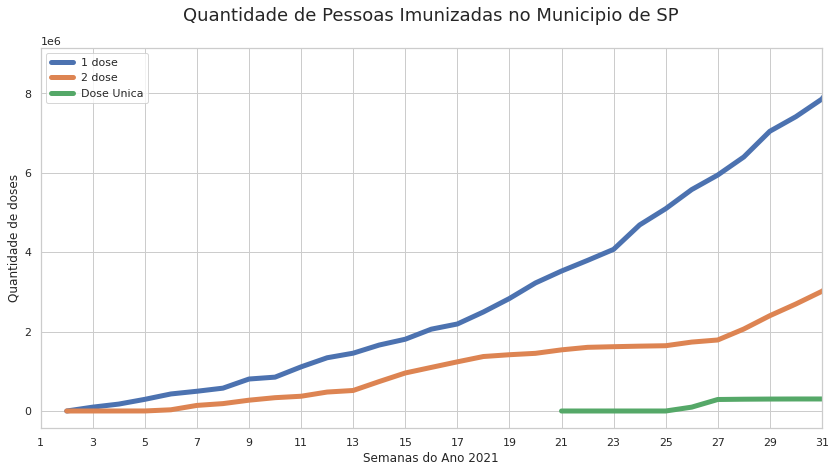

In [ ]:
#Plotando o gráfico de vacinas acumuladas por semana e diferenciando cada dose
vacina_sp.groupby(['semana_ano_aplicacao','vacina_descricao_dose']).agg({'semana_ano_aplicacao':'count'}).unstack().cumsum().plot(kind = 'line',xlim = (1,31),xticks = (range(1,32,2)),figsize =(14,7),linewidth = 5,xlabel = "Semanas do Ano 2021",ylabel = "Quantidade de doses")
plt.title("Quantidade de Pessoas Imunizadas no Municipio de SP\n",fontsize = 18)
plt.legend(labels = ["1 dose","2 dose","Dose Unica"])
plt.show()

Anuncio de Volta as aulas para dia 02 de agosto, que ocorre na semana 31 no gráfico

https://g1.globo.com/sp/sao-paulo/noticia/2021/07/20/prefeitura-de-sp-anuncia-retomada-das-aulas-presenciais-em-2-de-agosto-para-100percent-dos-alunos-por-meio-de-rodizio-creches-terao-60percent-da-capacidade.ghtml

Nessa semana **7.855.271** de pessoas tinham tomado a primeira dose

**3.013.580** tinham tomado a segunda dose e **302.946** tinham tomado a dose única

Sabendo que a população desse municipio possui aproximadamente 12,3 milhões de habitantes.

Fonte: https://cidades.ibge.gov.br/brasil/sp/sao-paulo/panorama

Então até essa semana cerca de **63.86%** da população tinha tomado apenas 1 dose,
**24,5%** a segunda dose e **2,46%** a Dose única

Text(0.5, 0, '')

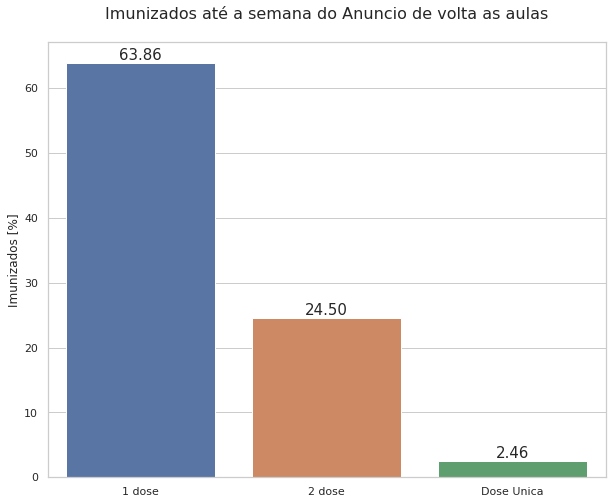

In [ ]:
#Criando um gráfico para visualizar as porcentagens de população vacinada
dataframe = {"Dose" : ["1 dose" , "2 dose", "Dose Unica"], "Imunizados": [63.86,24.5,2.46]}
df = pd.DataFrame(dataframe)

plt.figure(figsize = (10,8))
plots = sns.barplot(x = df['Dose'], y = df['Imunizados'])

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.title("Imunizados até a semana do Anuncio de volta as aulas\n",fontsize = 16)
plt.ylabel("Imunizados [%]")
plt.xlabel('')
